In [39]:
import keyring
from astroquery.astrometry_net import AstrometryNet
from alora.astroutils import calc_mean_fwhm, source_catalog

import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
from astropy.io import fits

In [35]:
DATA_DIR = r"im4_L_20241216_2x2_00000833.fit"
with fits.open(DATA_DIR) as hdul:
    data = hdul[0].data
    header = hdul[0].header
mean_fwhm = calc_mean_fwhm(data)
mean_fwhm

5.615064444628027

In [41]:
guess_coords = SkyCoord(Angle(header["OBJCTRA"],unit="hourangle"), Angle(header["OBJCTDEC"],unit="deg"))

In [66]:
ra, dec = header["OBJCTRA"], header["OBJCTDEC"]

('17 26 57.065', '+65 15 14.34')

In [23]:
mycat = source_catalog(data,source_sigma=3,ncont=5,fwhm_pix=mean_fwhm)
mycat

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr,fwhm
,,,,,,,,pix2,pix,pix,deg,,,,,,,,,pix
int64,float64,float64,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,847.1947239263803,544.8333742331288,None,838,857,534,555,336.0,4.027153411172908,3.4446951100692864,63.063465531497776,0.5180220842450515,0.0,416.0,0.0,32600.0,nan,37549.46925570314,nan,8.82411887463872
18,241.20720469142697,1636.1709019826865,None,231,251,1626,1647,353.0,4.343408922788694,3.992501246424753,-59.12864479200889,0.3937696396025008,0.0,276.0,0.0,28648.0,nan,31903.89698200508,nan,9.823476549388822
10,919.8098201936376,627.7017634854772,None,911,928,618,637,280.0,3.7813660749646694,3.321924461216585,71.70883509548234,0.4777450874476269,0.0,284.0,0.0,23136.0,nan,28811.985796713816,nan,8.380961601605502
3,1916.901144640999,497.2598855359001,None,1908,1926,489,506,249.0,3.9888403523828506,3.537244678434123,-27.879946753622757,0.46218174951767915,-8.0,140.0,0.0,15368.0,nan,19182.318404641155,nan,8.877226090334121
16,551.8418238993711,1409.685534591195,None,544,559,1402,1418,217.0,3.6022531423663127,3.407565017177621,-79.99971330133208,0.32430144119304816,8.0,148.0,0.0,12720.0,nan,18197.912716111867,nan,8.256612787259755
17,329.6018766756032,1430.054959785523,None,324,335,1424,1436,131.0,2.9702215515258357,2.8258503279901945,87.07405192823381,0.3079770501708247,12.0,96.0,0.0,5968.0,nan,10369.114823183281,nan,6.826469815278339
1,1298.9918931807345,277.967095851216,None,1294,1304,273,282,82.0,0.5557556390240905,0.4833435927836469,-26.231910521301373,0.49357146518496076,-12.0,8076.0,0.0,8236.0,nan,8096.684549866596,nan,1.2264129762529576
19,1270.0418994413408,1633.7150837988827,None,1267,1273,1631,1637,40.0,1.8430302016279059,1.6024334321784353,33.34508210513117,0.49401061284868875,16.0,60.0,0.0,1432.0,nan,6410.1247650179885,nan,4.066602146144283


In [15]:
cat = Table.read("axy.fits")
cat

X,Y,FLUX,BACKGROUND
float32,float32,float32,float32
1299.9495,279.02258,284.3308,186.14813
848.3542,545.91876,272.4346,187.57803
201.02235,725.9589,204.57933,185.21574
243.08138,1636.2616,201.611,183.92813
1917.4055,498.42236,106.728,184.93527
907.1247,1110.0459,64.79219,188.72084
1520.0249,1264.9215,52.875397,187.54926
2203.8938,916.99365,40.692764,184.38939
920.9365,628.78796,200.99886,188.10966


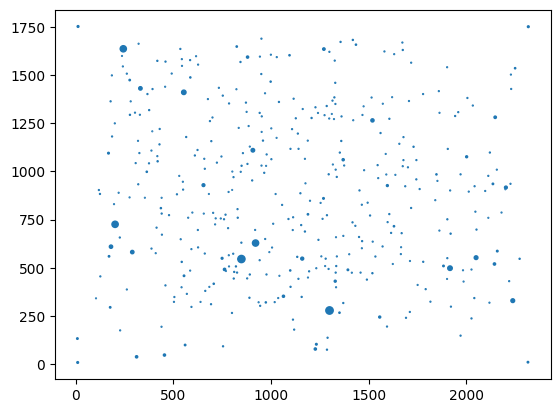

In [21]:
plt.scatter(cat["X"],cat["Y"],s=cat["FLUX"]/10)

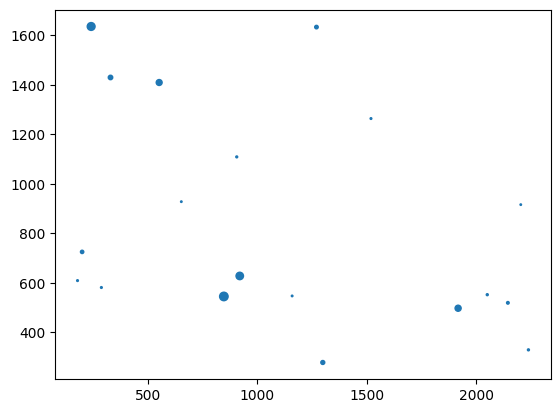

In [25]:
plt.scatter(mycat["xcentroid"],mycat["ycentroid"],s=mycat["kron_flux"]/1000)

In [ ]:
small_cat = mycat["xcentroid","ycentroid"]
small_cat.write("small_cat.csv")

# this catalog successfully solves with astro.net

In [32]:
ast = AstrometryNet()
ast.api_key = keyring.get_password("astrometry_net","api")

In [67]:
guess_coords.ra.deg, guess_coords.dec.deg

(np.float64(261.73777083333334), np.float64(65.25398333333334))

In [64]:
astrom_params = {"scale_units":"arcsecperpix","scale_est":0.63, "scale_type":"ev", "scale_err":10, "center_ra":guess_coords.ra.deg,"center_dec":guess_coords.dec.deg,"radius":1,"publicly_visible":"n", "parity":1}

In [62]:
data.shape[1],data.shape[0]

(2328, 1760)

In [68]:
ast.solve_from_source_list(small_cat["xcentroid"],small_cat["ycentroid"],data.shape[1],data.shape[0],solve_timeout=120,return_submission_id=True, **astrom_params)

Solving..........

(SIMPLE  =                    T / Standard FITS file                             
 BITPIX  =                    8 / ASCII or bytes array                           
 NAXIS   =                    0 / Minimal header                                 
 EXTEND  =                    T / There may be FITS ext                          
 WCSAXES =                    2 / no comment                                     
 CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
 CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
 EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
 LONPOLE =                180.0 / no comment                                     
 LATPOLE =                  0.0 / no comment                                     
 CRVAL1  =        260.829444473 / RA  of reference point                         
 CRVAL2  =         64.754624963 / DEC of reference point                         
 CRPIX1  =      

In [34]:
AstrometryNet.show_allowed_settings()

allow_commercial_use: type 'str', default value d, allowed values ('d', 'y', 'n')
allow_modifications: type 'str', default value d, allowed values ('d', 'y', 'n')
center_dec: type 'float', default value None, allowed values (-90, 90)
center_ra: type 'float', default value None, allowed values (0, 360)
crpix_center: type 'bool', default value None, allowed values ()
downsample_factor: type 'int', default value None, allowed values (1,)
parity: type 'int', default value None, allowed values (0, 2)
positional_error: type 'float', default value None, allowed values (0,)
publicly_visible: type 'str', default value y, allowed values ('y', 'n')
radius: type 'float', default value None, allowed values (0,)
scale_err: type 'float', default value None, allowed values (0, 100)
scale_est: type 'float', default value None, allowed values (0,)
scale_lower: type 'float', default value None, allowed values (0,)
scale_type: type 'str', default value None, allowed values ('ev', 'ul')
scale_units: type '

In [69]:
small_cat.write("small_cat.fits",overwrite=True)

In [70]:
small_cat

xcentroid,ycentroid
float64,float64
847.1947239263803,544.8333742331288
241.20720469142697,1636.1709019826865
919.8098201936376,627.7017634854772
1916.901144640999,497.2598855359001
551.8418238993711,1409.685534591195
329.6018766756032,1430.054959785523
1298.9918931807345,277.967095851216
1270.0418994413408,1633.7150837988827
199.98616600790513,724.9848484848485
